# 5.1.2 Transformación de la variable pronósticada en regresión con TransformedTargetRegressor

In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import QuantileTransformer

import warnings
warnings.filterwarnings("ignore")

## 5.1.2.1 Uso básico con funciones de usuario

link: https://www.youtube.com/watch?v=Kn6RS1FT9fQ

In [2]:

#
# Generación de la muestra de datos
#
X, y = make_regression(
    n_samples=300,
    n_features=1,
    n_targets=1,
    bias=150,
    noise=9.0,
    shuffle=False,
    random_state=123456,
)

argsort = np.argsort(X[:, 0])
X = X[argsort]
y = y[argsort]

y = np.exp(0.01 * y)

In [3]:
#
# Definición de una transformación simple
#
def target_transformer(x):
    return np.log(x)


def inverse_target_transformer(x):
    return np.exp(x)

In [4]:
linearRegression = LinearRegression()

regressor = TransformedTargetRegressor(
    # -------------------------------------------------------------------------
    # Regressor object
    regressor=linearRegression,
    # -------------------------------------------------------------------------
    # Function to apply to y before passing to fit.
    func=target_transformer,
    # -------------------------------------------------------------------------
    # Function to apply to the prediction of the regressor.
    inverse_func=inverse_target_transformer,
)

regressor.fit(X, y)

y_pred = regressor.predict(X)

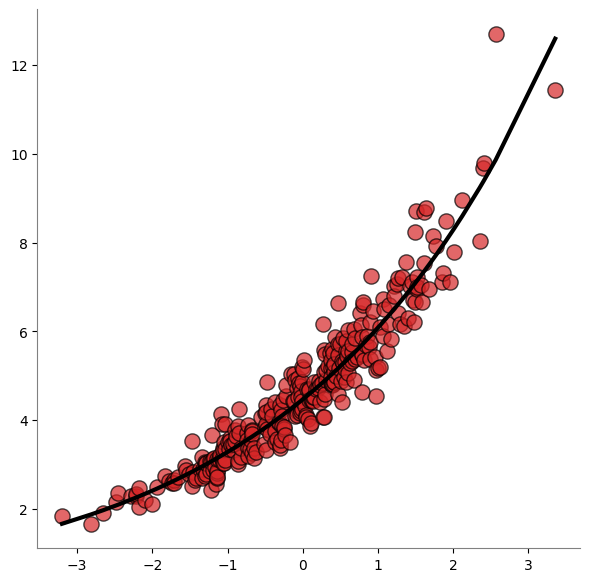

In [11]:
plt.figure(figsize=(7, 7))
plt.scatter(
    X[:, 0],
    y,
    color="tab:red",
    edgecolors="k",
    s=120,
    alpha=0.7,
)

plt.plot(
    X[:, 0],
    y_pred,
    color="k",
    linewidth=3,
)


plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [5]:
#
# Fitted regressor.
#
regressor.regressor_

LinearRegression()

## 5.1.2.2 Uso con pipelines

In [8]:
#
# Generación de la muestra de datos
#
X, y = make_regression(
    n_samples=500,
    n_features=5,
    n_informative=1,
    n_targets=1,
    bias=400,
    noise=7.0,
    shuffle=False,
    random_state=12345,
)

argsort = np.argsort(X[:, 0])
X = X[argsort, :]
y = y[argsort]

y = np.exp(0.01 * y)

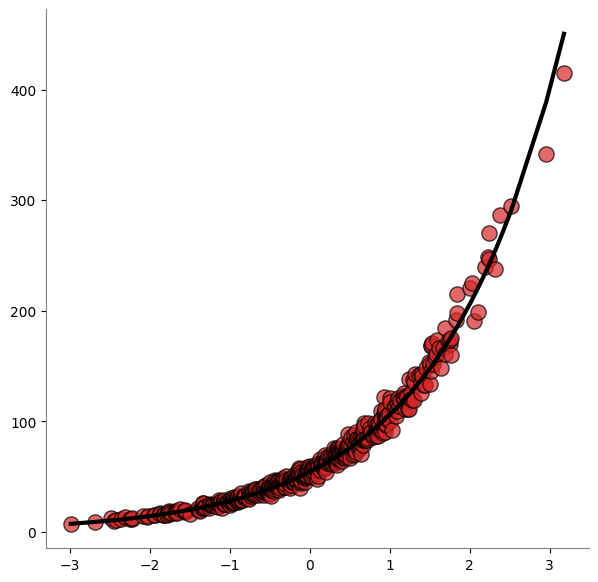

In [9]:
pipeline = Pipeline(
    steps=[
        ("selectKBest", SelectKBest(f_regression)),
        ("linearRegression", LinearRegression()),
    ]
)


transformedTargetRegressor = TransformedTargetRegressor(
    regressor=pipeline,
    func=target_transformer,
    inverse_func=inverse_target_transformer,
)

param_grid = {
    "regressor__selectKBest__k": [1, 2, 3, 4, 5],
}


gridSearchCV = GridSearchCV(
    estimator=transformedTargetRegressor,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
)


gridSearchCV.fit(X, y)

y_pred = gridSearchCV.predict(X)

plt.figure(figsize=(7, 7))
plt.scatter(
    X[:, 0],
    y,
    color="tab:red",
    edgecolors="k",
    s=120,
    alpha=0.7,
)

plt.plot(
    X[:, 0],
    y_pred,
    color="k",
    linewidth=3,
)


plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [10]:
gridSearchCV.best_params_

{'regressor__selectKBest__k': 1}

## 5.1.2.3 Uso con transformadores

In [12]:
#
# Realiza una transformación no lineal que mapea
# los datos a una distribucion normal
#
quantileTransformer = QuantileTransformer(
    n_quantiles=300,
    output_distribution="normal",
)

regressor = TransformedTargetRegressor(
    # -------------------------------------------------------------------------
    # Regressor object
    regressor=linearRegression,
    # -------------------------------------------------------------------------
    # Estimator object
    transformer=quantileTransformer,
)

regressor.fit(X, y)

y_pred = regressor.predict(X)

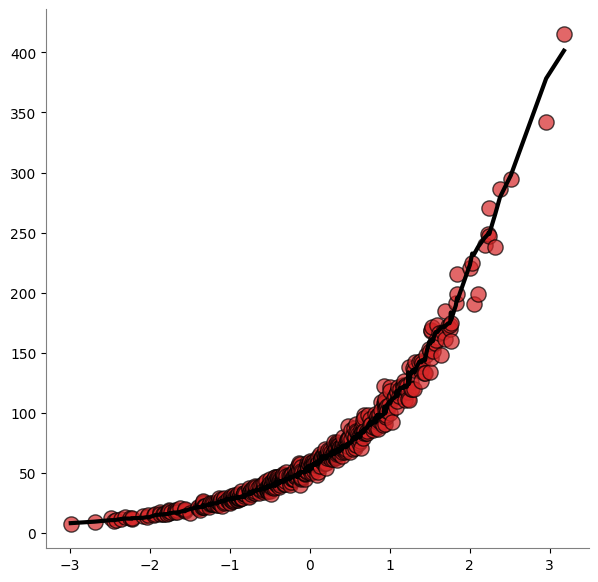

In [13]:
plt.figure(figsize=(7, 7))
plt.scatter(
    X[:, 0],
    y,
    color="tab:red",
    edgecolors="k",
    s=120,
    alpha=0.7,
)

plt.plot(
    X[:, 0],
    y_pred,
    color="k",
    linewidth=3,
)


plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [ ]:
print('ok_')